In [1]:
import sys
sys.path.append("..")
from src.mcts.agent import MCTSAgent

import chess
import pandas as pd

paths_df = pd.read_csv("../tree_paths.csv")
paths_df["node_path"] = paths_df["node_path"].apply(eval)
paths_df["rollout_path"] = paths_df["rollout_path"].apply(eval)
paths_df["node1"] = paths_df["node_path"].apply(lambda x: x[0])
paths_df["node2"] = paths_df["node_path"].apply(lambda x: x[1] if len(x) >= 2 else None)
paths_df

,initial_state,node_path,rollout_path,final_state,value,node1,node2
0,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,[e8d8],"[f7e7, f8e7]",rnbk2nr/ppppb1pp/4p3/6q1/8/4P3/PPPP1PPP/RNB1KB...,0.310026,e8d8,None
1,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,[e8f7],"[e1e2, g5g4]",rnb2bnr/pppp1kpp/4p3/8/6q1/4P3/PPPPKPPP/RNB2BN...,0.214165,e8f7,None
2,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,"[e8f7, g1f3]","[g5h5, b2b4]",rnb2bnr/pppp1kpp/4p3/7q/1P6/4PN2/P1PP1PPP/RNB1...,0.310026,e8f7,g1f3
3,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,"[e8d8, f7f8]",[],rnbk1Qnr/pppp2pp/4p3/6q1/8/4P3/PPPP1PPP/RNB1KB...,1.000000,e8d8,f7f8
4,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,"[e8f7, g2g3]","[f7e7, d2d4]",rnb2bnr/ppppk1pp/4p3/6q1/3P4/4P1P1/PPP2P1P/RNB...,0.310026,e8f7,g2g3
...,...,...,...,...,...,...,...
166,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,"[e8f7, g1e2, h7h5]","[b1a3, c7c6]",rnb2bnr/pp1p1kp1/2p1p3/6qp/8/N3P3/PPPPNPPP/R1B...,0.310026,e8f7,g1e2
167,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,"[e8d8, h2h4, g8h6]","[f2f4, g7g6]",rnbk1b1r/pppp1Q1p/4p1pn/6q1/5P1P/4P3/PPPP2P1/R...,0.524979,e8d8,h2h4
168,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,"[e8f7, g1h3, a7a6]","[e3e4, g7g6]",rnb2bnr/1ppp1k1p/p3p1p1/6q1/4P3/7N/PPPP1PPP/RN...,0.310026,e8f7,g1h3
169,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,"[e8f7, f1d3, g8f6]","[g1f3, g5g3]",rnb2b1r/pppp1kpp/4pn2/8/8/3BPNq1/PPPP1PPP/RNB1...,0.310026,e8f7,f1d3


In [2]:
print(paths_df["value"].mean())
print(paths_df.loc[paths_df["node1"] == "e8d8", "value"].mean())
print(paths_df.loc[paths_df["node1"] == "e8f7", "value"].mean())

0.3713826730942882
0.531842444442063
0.3050769824547118


In [5]:
first_moves = paths_df["node1"].unique()
first_move_results = []
for move in first_moves:
    first_move_results.append({
        "move": move,
        "sum_value": paths_df.loc[paths_df["node1"] == move, :]["value"].sum(),
        "avg_value": paths_df.loc[paths_df["node1"] == move, :]["value"].mean(),
        "visits": len(paths_df.loc[paths_df["node1"] == move, :])
    })
first_move_results_df = pd.DataFrame(first_move_results).sort_values("avg_value", ascending=False).reset_index(drop=True)
print(first_move_results_df.loc[first_move_results_df["move"] == "e8d8", :])
first_move_results_df

   move  sum_value  avg_value  visits
1  e8d8  73.595435   0.518278     142


,move,sum_value,avg_value,visits
0,e8f7,47.079734,0.692349,68
1,e8d8,73.595435,0.518278,142


In [6]:
distribution = pd.read_csv("../distribution.csv")
distribution["avg_reward"] = distribution.apply(lambda x: x["reward"] / x["visits"], axis=1)
distribution = distribution.sort_values("avg_reward", ascending=False)
distribution

,turn,state,action,visits,reward,ucb,avg_reward
0,0,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,e8d8,142,68.404565,0.869824,0.481722
1,0,rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1K...,e8f7,68,20.920266,0.868486,0.307651


In [3]:
starting_state = "rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1KBNR b KQkq - 0 3"
board = chess.Board(starting_state)
print("Starting State")
print(MCTSAgent._estimate_value(board.fen()))
print(board)
# action = move_distribution.loc[i, "action"]
action = "e8f7"
print("\nFinal State")
board.push(chess.Move.from_uci(action))
print(MCTSAgent._estimate_value(board.fen()))
print(board)

Starting State
0.6456563062257954
r n b . k b n r
p p p p . Q p p
. . . . p . . .
. . . . . . q .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B . K B N R

Final State
0.31002551887238755
r n b . . b n r
p p p p . k p p
. . . . p . . .
. . . . . . q .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B . K B N R


I broke it somehow by setting root node to be not self.side instead of self.side??? not sure what happened. 
I was looking at the paths, but then somehow the mode performed ('e8d8') was not in the first moves?? something is very wrong here.

In [48]:
from src.mcts.agent import MCTSAgent, render

# state = "rnbqkb1r/p1ppppp1/1p5p/8/Pn6/3P1P1P/2P1PKP1/RNBQ1BNR b kq - 0 6"
state = "rnb1kbnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1KBNR b KQkq - 0 3"
board = chess.Board(state)
white_mcts = MCTSAgent(
    side_is_white=True,
    show=MCTSAgent.ShowLevel.MOVE,
    max_depth=30,
    time_limit=10,
)
black_mcts = MCTSAgent(
    side_is_white=False,
    show=MCTSAgent.ShowLevel.PATHS,
    max_depth=2,
    time_limit=10,
)

# for i in range(20):
#     board.push(random.choice([move for move in board.legal_moves]))

for _ in range(1):
    if board.turn == chess.WHITE:
        action = white_mcts.pred(board.fen())
        print(f"White {action = }")
    else:
        action = black_mcts.pred(board.fen())
        print(f"Black {action = }")
    board.push(action)
    render(board)

    if board.is_game_over():
        print(board.outcome())
        break


 2023-08-22 23:27:49 | INFO     | __move_logging:304 | MOVE - turn:0 reason:found action:e8d8 iters:221 max_visit:148 avg_rollout_time:0.0003 avg_depth:1.9500 state:rnbk1bnr/pppp1Qpp/4p3/6q1/8/4P3/PPPP1PPP/RNB1KBNR w KQ - 1 4 
Black action = <src.mcts.agent.MCTSNode object at 0x14cfa26b0>


AttributeError: 'MCTSNode' object has no attribute 'from_square'

# Node tree analysis

In [33]:
import sys
sys.path.append("..")
from src.mcts.agent import MCTSAgent

import chess
import pandas as pd

tree_df = pd.read_csv("../tree.csv")
state_index = {state: i for i, state in enumerate(tree_df["node_state"])}
tree_df["avg_reward"] = tree_df.apply(lambda row: row["total_reward"] / row["visits"] if row["visits"] else 0, axis=1)
tree_df["parent_index"] = tree_df["parent_state"].map(state_index)

def depth(index:int) -> int:
    parent_index = tree_df.loc[index, "parent_index"]
    d = 0
    while not pd.isna(parent_index):
        d += 1
        parent_index = tree_df.loc[parent_index, "parent_index"]
    return d

tree_df["depth"] = [depth(i) for i in range(len(tree_df))]
tree_df

,node_state,parent_state,node_action,visits,total_reward,ucb,avg_reward,parent_index,depth
0,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,NaN,NaN,18715,9511.78,NaN,0.508244,NaN,0
1,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5h7,1342,665.66,0.513144,0.496021,0.0,1
2,rnbqkbnr/1p1ppNpp/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5f7,729,357.12,0.513109,0.489877,0.0,1
3,rnbqkbnr/1p1pp1pp/4Np2/p1p5/8/7P/PPPPPPP1/RNBQ...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5e6,1147,567.30,0.513116,0.494595,0.0,1
4,rnbqkbnr/1p1pp1pp/5p2/p1p5/4N3/7P/PPPPPPP1/RNB...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5e4,2855,1431.56,0.513162,0.501422,0.0,1
...,...,...,...,...,...,...,...,...,...
62657,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/4PP2/7P/PPPP2P1/RN...,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/4P3/7P/PPPP1PP1/RN...,f2f4,0,0.00,inf,0.000000,57276.0,5
62658,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/3PP3/7P/PPP2PP1/RN...,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/4P3/7P/PPPP1PP1/RN...,d2d4,0,0.00,inf,0.000000,57276.0,5
62659,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/2P1P3/7P/PP1P1PP1/...,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/4P3/7P/PPPP1PP1/RN...,c2c4,0,0.00,inf,0.000000,57276.0,5
62660,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/1P2P3/7P/P1PP1PP1/...,rnbqkbnr/1p1pp2p/6p1/p1p3pQ/4P3/7P/PPPP1PP1/RN...,b2b4,0,0.00,inf,0.000000,57276.0,5


In [34]:
first_layer = tree_df.loc[tree_df["depth"] == 1]
second_layer = tree_df.loc[tree_df["depth"] == 2]
third_layer = tree_df.loc[tree_df["depth"] == 3]
first_layer.sort_values("visits", ascending=False)

,node_state,parent_state,node_action,visits,total_reward,ucb,avg_reward,parent_index,depth
4,rnbqkbnr/1p1pp1pp/5p2/p1p5/4N3/7P/PPPPPPP1/RNB...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5e4,2855,1431.56,0.513162,0.501422,0.0,1
5,rnbqkbnr/1p1pp1pp/5p2/p1p5/8/5N1P/PPPPPPP1/RNB...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5f3,2646,1325.66,0.513200,0.501005,0.0,1
1,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5h7,1342,665.66,0.513144,0.496021,0.0,1
3,rnbqkbnr/1p1pp1pp/4Np2/p1p5/8/7P/PPPPPPP1/RNBQ...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5e6,1147,567.30,0.513116,0.494595,0.0,1
2,rnbqkbnr/1p1ppNpp/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g5f7,729,357.12,0.513109,0.489877,0.0,1
19,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/5P2/7P/PPPPP1P1/R...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,f2f4,610,297.52,0.513136,0.487738,0.0,1
7,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,h1g1,587,286.02,0.513148,0.487257,0.0,1
15,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/2P4P/PP1PPPP1/R...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,c2c3,587,285.98,0.513080,0.487189,0.0,1
23,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/1P6/7P/P1PPPPP1/R...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,b2b4,580,282.52,0.513150,0.487103,0.0,1
18,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/6P1/7P/PPPPPP2/RN...,rnbqkbnr/1p1pp1pp/5p2/p1p3N1/8/7P/PPPPPPP1/RNB...,g2g4,575,279.98,0.513081,0.486922,0.0,1


In [36]:
first_move_state = first_layer.loc[first_layer["node_action"] == "g5h7", "node_state"].values[0]
first_move_children = second_layer.loc[second_layer["parent_state"] == first_move_state]
first_move_children.sort_values("visits", ascending=False)

,node_state,parent_state,node_action,visits,total_reward,ucb,avg_reward,parent_index,depth
25,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,h8h7,569,307.34,0.562641,0.540141,1.0,2
44,rnbqkbnr/3pp1pN/5p2/ppp5/8/7P/PPPPPPP1/RNBQKB1...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,b7b5,47,22.70,0.561269,0.482979,1.0,2
35,rnbqkbnr/1p1p2pN/4pp2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,e7e6,46,22.24,0.562614,0.483478,1.0,2
42,rnbqkbnr/1p1p2pN/5p2/p1p1p3/8/7P/PPPPPPP1/RNBQ...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,e7e5,46,22.20,0.561745,0.482609,1.0,2
33,1nbqkbnr/1p1pp1pN/r4p2/p1p5/8/7P/PPPPPPP1/RNBQ...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,a8a6,46,22.22,0.562180,0.483043,1.0,2
26,rnbqkb1r/1p1pp1pN/5p1n/p1p5/8/7P/PPPPPPP1/RNBQ...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,g8h6,46,22.24,0.562614,0.483478,1.0,2
41,rnbqkbnr/1p1pp2N/5p2/p1p3p1/8/7P/PPPPPPP1/RNBQ...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,g7g5,45,21.70,0.562233,0.482222,1.0,2
39,rnbqkbnr/1p1pp1pN/5p2/p7/2p5/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,c5c4,45,21.68,0.561788,0.481778,1.0,2
28,rnb1kbnr/1pqpp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,d8c7,43,20.62,0.561385,0.479535,1.0,2
34,rnbqkbnr/1p1pp2N/5pp1/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbnr/1p1pp1pN/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,g7g6,42,20.12,0.561867,0.479048,1.0,2


In [4]:
(first_move_children["visits"].sum() - first_move_children["total_reward"].sum()) / first_move_children["visits"].sum()

0.5104235408665563

In [6]:
state = first_move_children.loc[first_move_children["node_action"] == "h8h7", "node_state"].values[0]
third_layer = tree_df.loc[tree_df["depth"] == 3]
c = third_layer.loc[third_layer["parent_state"] == state]
c

,node_state,parent_state,node_action,visits,total_reward,avg_reward,parent_index,depth
509,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPPR/RNBQK...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,h1h2,48,22.785714,0.474702,25.0,3
510,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,h1g1,47,22.214286,0.472644,25.0,3
511,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/2N4P/PPPPPPP1/R1B...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,b1c3,46,21.685714,0.471429,25.0,3
512,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/N6P/PPPPPPP1/R1BQ...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,b1a3,45,21.157143,0.470159,25.0,3
513,rnbqkbn1/1p1pp1pr/5p2/p1p5/7P/8/PPPPPPP1/RNBQK...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,h3h4,46,21.657143,0.470807,25.0,3
514,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/6PP/PPPPPP2/RNBQK...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,g2g3,47,22.300000,0.474468,25.0,3
515,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/5P1P/PPPPP1P1/RNB...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,f2f3,45,21.085714,0.468571,25.0,3
516,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/4P2P/PPPP1PP1/RNB...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,e2e3,46,21.700000,0.471739,25.0,3
517,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/3P3P/PPP1PPP1/RNB...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,d2d3,46,21.700000,0.471739,25.0,3
518,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/2P4P/PP1PPPP1/RNB...,rnbqkbn1/1p1pp1pr/5p2/p1p5/8/7P/PPPPPPP1/RNBQK...,c2c3,47,22.228571,0.472948,25.0,3


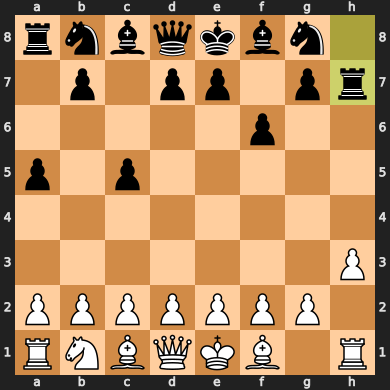

In [7]:
board = chess.Board(first_move_state)
board.push(chess.Move.from_uci(first_move_children.sort_values("visits", ascending=False)["node_action"].values[0]))
board

In [9]:
iters:18637